<a href="https://colab.research.google.com/github/kalki81000/Machine-Learning-Revision-Last-2025-/blob/main/diamond_price_prediction_random_forest_classifier_and_regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("diamonds.csv")

In [ ]:
df = df.drop("Unnamed: 0", axis = 1)

In [ ]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [ ]:
df.duplicated().sum()

146

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
df.carat.unique()

array([0.23, 0.21, 0.29, 0.31, 0.24, 0.26, 0.22, 0.3 , 0.2 , 0.32, 0.33,
       0.25, 0.35, 0.42, 0.28, 0.38, 0.7 , 0.86, 0.71, 0.78, 0.96, 0.73,
       0.8 , 0.75, 0.74, 0.81, 0.59, 0.9 , 0.91, 0.61, 0.77, 0.63, 0.76,
       0.64, 0.72, 0.79, 0.58, 1.17, 0.6 , 0.83, 0.54, 0.98, 0.52, 1.01,
       0.53, 0.84, 0.51, 1.05, 0.55, 0.87, 1.  , 0.57, 0.82, 1.04, 0.93,
       1.2 , 0.99, 0.34, 0.43, 0.36, 0.95, 0.89, 1.02, 0.97, 0.56, 0.85,
       0.92, 1.27, 0.66, 1.12, 0.68, 1.03, 0.62, 1.22, 1.08, 0.88, 0.5 ,
       1.19, 0.39, 0.65, 1.24, 1.5 , 0.27, 0.41, 1.13, 1.06, 0.69, 0.4 ,
       1.14, 0.94, 1.29, 1.52, 1.16, 1.21, 1.23, 1.09, 0.67, 1.11, 1.1 ,
       1.18, 1.15, 1.25, 1.07, 1.28, 1.51, 0.37, 1.31, 1.26, 1.39, 1.44,
       1.35, 1.3 , 1.32, 1.41, 1.36, 1.45, 1.34, 1.58, 1.54, 1.38, 1.33,
       1.74, 1.64, 1.47, 1.4 , 1.55, 1.95, 2.  , 1.37, 1.83, 1.62, 1.57,
       1.69, 2.06, 1.72, 1.66, 2.14, 1.49, 1.46, 2.15, 1.96, 2.22, 1.7 ,
       1.53, 1.85, 2.01, 2.27, 1.68, 1.56, 1.81, 1.

In [ ]:
df.carat.nunique()

273

In [ ]:
df.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [ ]:
# cut_map={'Fair':1,"Good":2,'Very Good':3,'Premium':4,'Ideal':5}
df.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [ ]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [ ]:
df.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [ ]:
df.depth

0        61.5
1        59.8
2        56.9
3        62.4
4        63.3
         ... 
53935    60.8
53936    63.1
53937    62.8
53938    61.0
53939    62.2
Name: depth, Length: 53794, dtype: float64

In [ ]:
df.table.unique()

array([55. , 61. , 65. , 58. , 57. , 56. , 54. , 62. , 59. , 63. , 60. ,
       55.3, 69. , 53. , 64. , 56.4, 60.5, 67. , 52. , 55.8, 66. , 70. ,
       68. , 54.4, 57.1, 53.6, 54.8, 54.2, 54.9, 56.7, 53.9, 57.8, 54.1,
       55.1, 51. , 58.1, 56.9, 56.5, 53.7, 60.7, 56.2, 56.6, 56.1, 56.3,
       57.2, 57.5, 60.9, 59.8, 62.3, 60.1, 55.9, 50.1, 62.2, 54.5, 55.7,
       53.4, 54.7, 58.8, 59.4, 62.5, 54.3, 60.6, 55.2, 58.6, 49. , 50. ,
       54.6, 62.6, 57.7, 56.8, 57.9, 60.3, 55.6, 59.5, 57.4, 62.4, 60.4,
       53.3, 60.2, 60.8, 58.5, 57.6, 43. , 59.9, 63.5, 57.3, 61.4, 58.3,
       55.4, 58.2, 53.5, 59.7, 55.5, 58.7, 53.8, 59.1, 53.2, 59.3, 61.1,
       51.6, 95. , 61.2, 59.2, 58.4, 53.1, 52.8, 44. , 61.3, 61.9, 61.8,
       59.6, 61.5, 58.9, 64.3, 62.8, 71. , 52.4, 63.3, 61.7, 64.2, 73. ,
       65.4, 63.4, 62.1, 79. , 76. , 61.6])

In [ ]:
df.price

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53794, dtype: int64

In [ ]:
df.x.unique()

array([ 3.95,  3.89,  4.05,  4.2 ,  4.34,  3.94,  4.07,  3.87,  4.  ,
        4.25,  3.93,  3.88,  4.35,  3.79,  4.38,  4.31,  4.23,  4.21,
        4.26,  3.85,  4.39,  4.44,  3.97,  4.28,  3.96,  4.04,  4.01,
        3.92,  4.06,  3.83,  4.29,  4.13,  4.49,  3.99,  4.19,  4.24,
        4.36,  4.33,  4.02,  4.45,  3.91,  4.3 ,  4.43,  4.54,  4.78,
        4.15,  4.08,  4.03,  4.65,  4.22,  5.7 ,  6.45,  5.68,  5.81,
        5.85,  5.71,  6.27,  5.77,  5.97,  5.8 ,  6.  ,  5.94,  5.87,
        5.9 ,  6.14,  5.38,  5.96,  6.16,  5.73,  5.98,  5.72,  6.01,
        5.64,  5.57,  5.63,  5.65,  6.09,  5.56,  6.11,  6.03,  5.89,
        5.69,  5.62,  5.88,  5.52,  5.74,  5.53,  5.78,  5.83,  5.66,
        5.82,  5.79,  5.92,  5.39,  5.33,  6.83,  5.41,  5.25,  5.24,
        5.67,  5.61,  5.76,  6.05,  5.6 ,  5.19,  5.84,  6.39,  5.34,
        5.14,  5.11,  5.54,  6.07,  6.29,  6.31,  6.49,  5.28,  5.48,
        5.55,  6.41,  6.02,  5.91,  6.17,  6.61,  5.12,  6.19,  5.43,
        5.99,  5.95,

In [ ]:
df.drop(df[df.x == 0].index, inplace=True)
df.drop(df[df.y == 0].index, inplace=True)
df.drop(df[df.z == 0].index, inplace=True)

In [ ]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


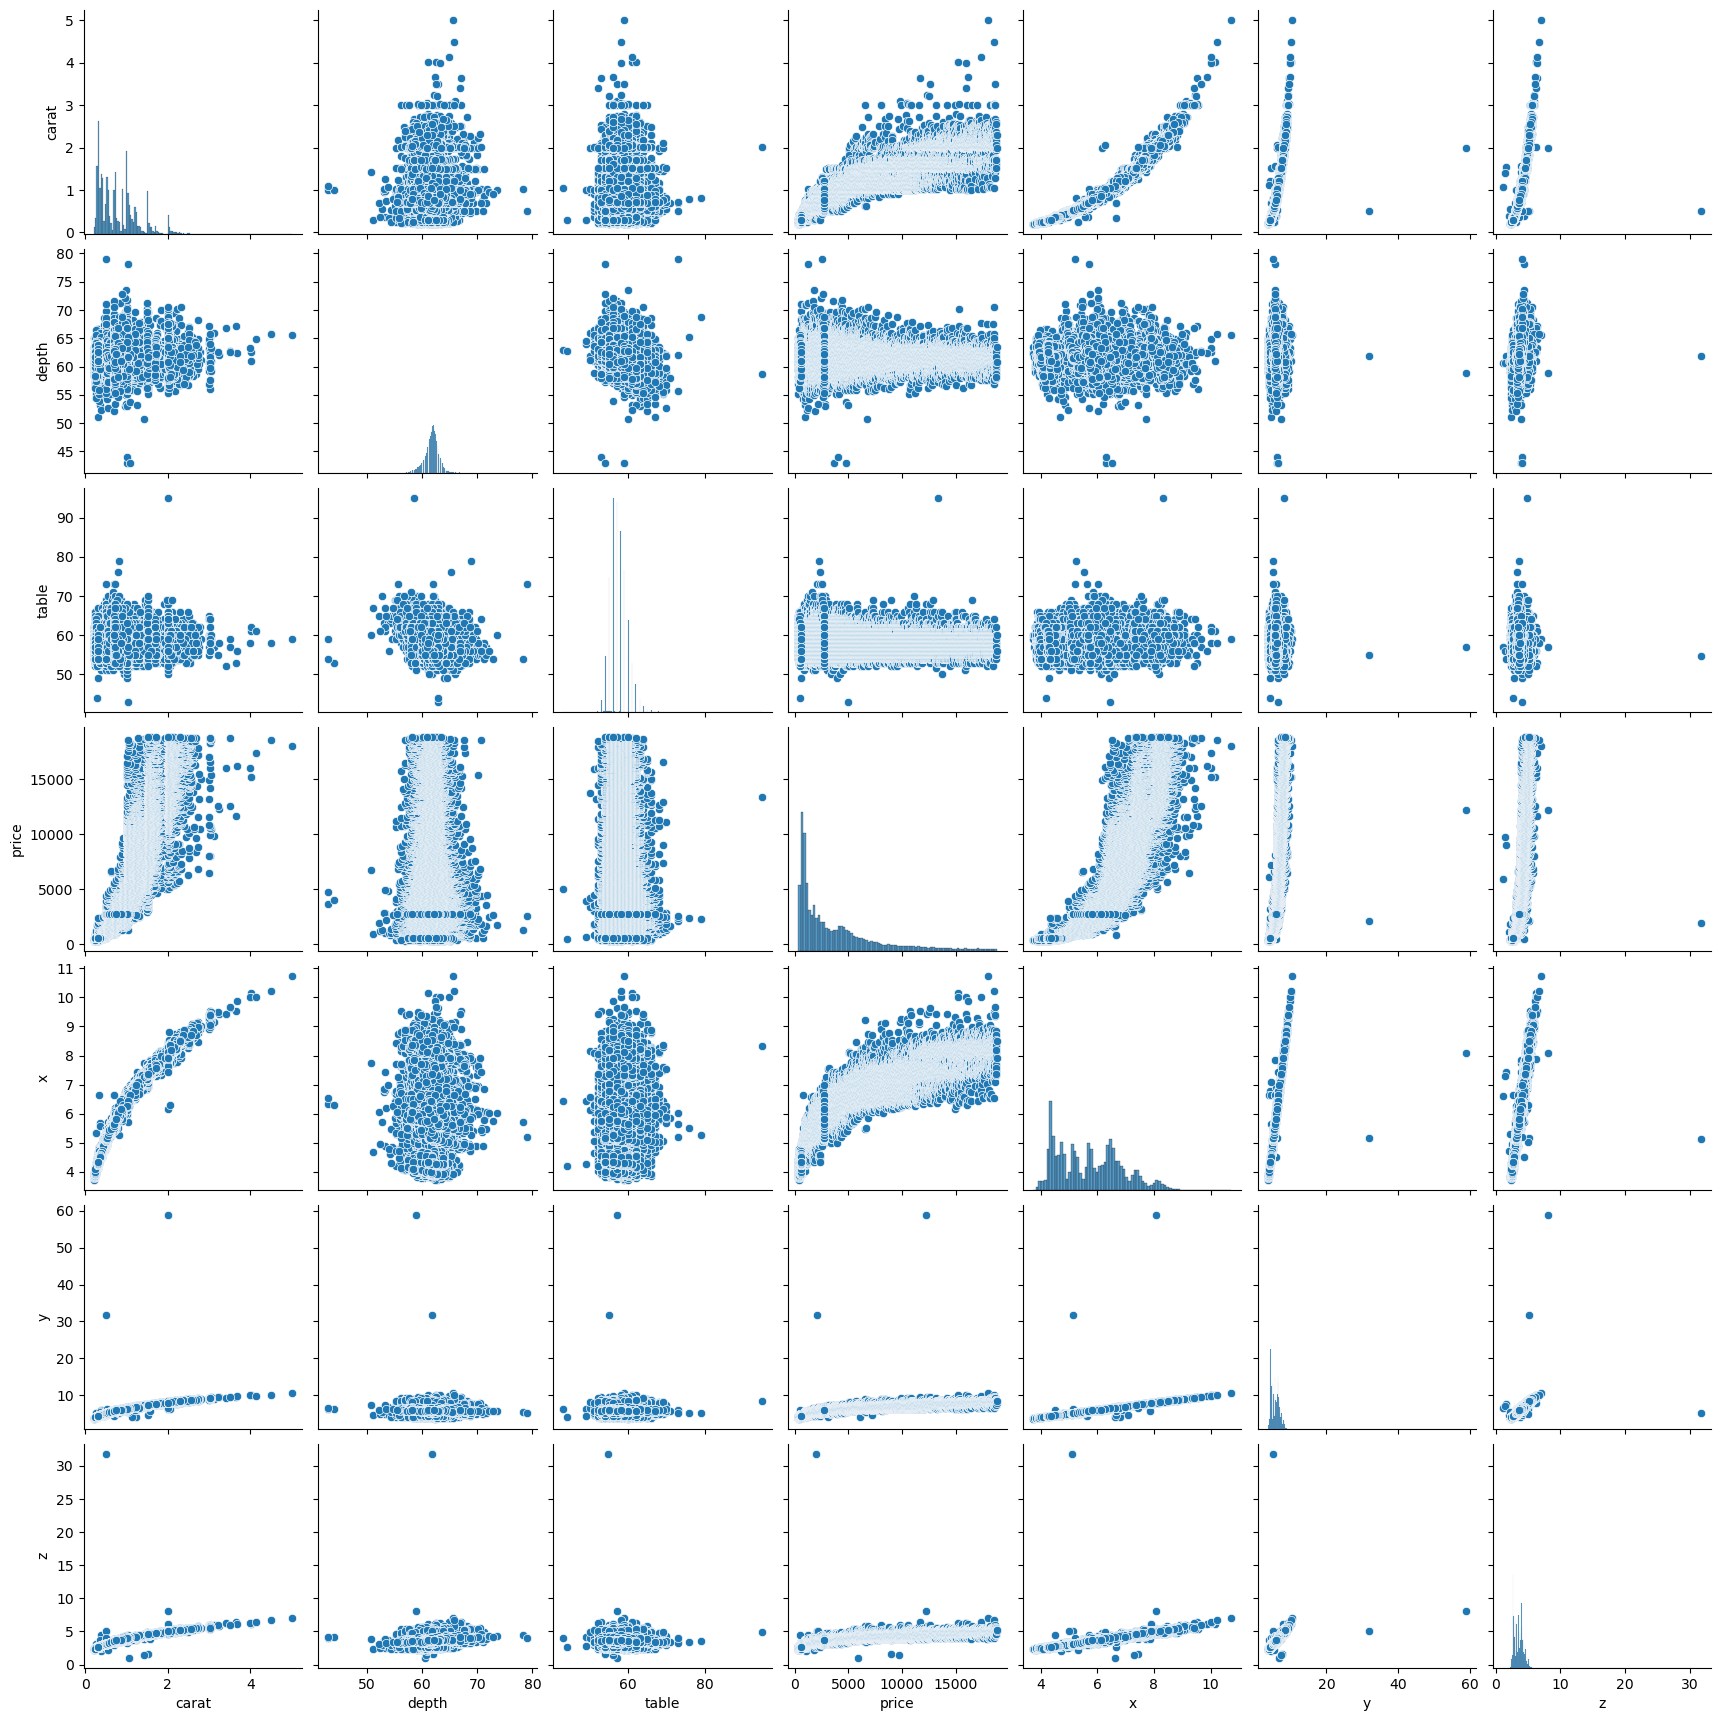

In [ ]:
#eda
sns.pairplot(df)

<Axes: >

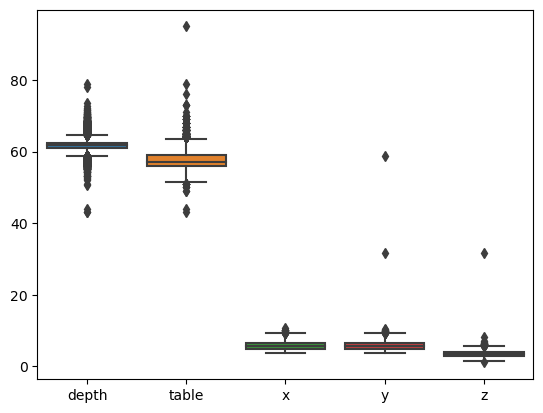

In [ ]:
cols = ['depth', 'table', 'x',	'y',	'z']
sns.boxplot(df[cols])

In [ ]:
np.quantile(df.depth, [0.25, 0.75])

array([61. , 62.5])

In [ ]:
df = df[(df.depth < 75) &  (df.depth > 45)]
df = df[(df.table < 80) &  (df.depth > 40)]
df = df[(df.z < 30) &  (df.depth > 2)]
df = df[(df.x < 30)]
df = df[(df.y < 30)]

In [ ]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
cut_map={'Fair':1,"Good":2,'Very Good':3,'Premium':4,'Ideal':5}
df.cut = df.cut.map(cut_map)

In [ ]:
clarity_map = {'I1':1,'SI2':2,'SI1':3,'VS2':4,'VS1':5,'VVS2':6,'VVS1':7,'IF':8}
color_map = {'F':3, 'J':7, 'G':4, 'E':2, 'D':1, 'H':5, 'I':6}


df.color = df.color.map(color_map)
df.clarity = df.clarity.map(clarity_map)

In [ ]:
df.dtypes

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [ ]:
# df.cut = df.cut.astype(int)

X = df.drop("price", axis = 1)
y = df.price

In [ ]:
X, y

(       carat  cut  color  clarity  depth  table     x     y     z
 0       0.23    5      2        2   61.5   55.0  3.95  3.98  2.43
 1       0.21    4      2        3   59.8   61.0  3.89  3.84  2.31
 2       0.23    2      2        5   56.9   65.0  4.05  4.07  2.31
 3       0.29    4      6        4   62.4   58.0  4.20  4.23  2.63
 4       0.31    2      7        2   63.3   58.0  4.34  4.35  2.75
 ...      ...  ...    ...      ...    ...    ...   ...   ...   ...
 53935   0.72    5      1        3   60.8   57.0  5.75  5.76  3.50
 53936   0.72    2      1        3   63.1   55.0  5.69  5.75  3.61
 53937   0.70    3      1        3   62.8   60.0  5.66  5.68  3.56
 53938   0.86    4      5        2   61.0   58.0  6.15  6.12  3.74
 53939   0.75    5      1        2   62.2   55.0  5.83  5.87  3.64
 
 [53766 rows x 9 columns],
 0         326
 1         326
 2         327
 3         334
 4         335
          ... 
 53935    2757
 53936    2757
 53937    2757
 53938    2757
 53939    2757
 N

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1)

In [ ]:
X_train

,carat,cut,color,clarity,depth,table,x,y,z
23493,2.07,5,7,4,62.2,56.0,8.20,8.16,5.09
10578,1.23,5,3,2,62.1,57.0,6.83,6.80,4.23
14822,1.38,5,7,2,62.6,56.0,7.05,7.16,4.45
42466,0.50,4,2,3,62.3,58.0,5.09,5.15,3.19
10216,1.21,4,5,3,60.5,60.0,6.81,6.72,4.09
...,...,...,...,...,...,...,...,...,...
50228,0.71,4,5,2,62.7,57.0,5.71,5.64,3.56
32622,0.31,5,5,3,61.5,56.5,4.34,4.36,2.67
5210,0.90,4,1,2,59.8,61.0,6.21,6.17,3.70
12210,1.22,4,5,2,61.6,59.0,6.82,6.75,4.18


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [ ]:
p_lr = Pipeline([("scaler1",  StandardScaler()),
         ("lrg", LinearRegression())])


p_vr = Pipeline([("scaler2",  StandardScaler()),
         ("svr", SVR())])


p_dtr = Pipeline([("scaler3",  StandardScaler()),
         ("dtr", DecisionTreeRegressor())])

p_rrr = Pipeline([("scaler4",  StandardScaler()),
         ("rrr", RandomForestRegressor())])

pipelines = [p_lr, p_vr, p_dtr, p_rrr]

for pipe in pipelines:
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    print("r2 score of", pipe, r2_score(y_pred, y_test))

r2 score of Pipeline(steps=[('scaler1', StandardScaler()), ('lrg', LinearRegression())]) 0.9007929755082098
r2 score of Pipeline(steps=[('scaler2', StandardScaler()), ('svr', SVR())]) -0.9322907533773701
r2 score of Pipeline(steps=[('scaler3', StandardScaler()),
                ('dtr', DecisionTreeRegressor())]) 0.9686618948487861
r2 score of Pipeline(steps=[('scaler4', StandardScaler()),
                ('rrr', RandomForestRegressor())]) 0.9820674056462836


In [ ]:
from sklearn.ensemble import RandomForestClassifier